# Detección MANOS

![image](https://user-images.githubusercontent.com/13495525/80187401-29794b80-8642-11ea-9de1-b9d2b6652ac0.gif)

# Paquetes

Instalamos los paquetes necesarios para poder reproducir el script.

Ejemplo de uso de MediaPipe Hands Solution API en Python (consulte también http://solutions.mediapipe.dev/hands). 



In [32]:
!pip install mediapipe

# Librerías

Importamos las librerías necesarias para poder reproducir el código.

> Esta sección carga algunas bibliotecas necesarias que se utilizan en este cuaderno: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

* [Numpy](https://www.numpy.org/) es una biblioteca de manipulación de matrices, utilizada para álgebra lineal, transformada de Fourier y capacidades de números aleatorios.
* [Pandas](https://pandas.pydata.org/) es una biblioteca para la manipulación y el análisis de datos.
* [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) es una biblioteca para tareas de visión por computadora.
* [Skimage](https://scikit-image.org/) es una biblioteca que admite aplicaciones de procesamiento de imágenes en Python.
* [Matplotlib](https://matplotlib.org/) es una biblioteca que genera figuras y proporciona un juego de herramientas de interfaz gráfica de usuario. 



In [33]:
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import math

# Procesamiento

Importamos una imagen desde nuestro PC y la cargamos.

_Sube cualquier imagen que contenga manos a Colab. Si no, Tomamos dos ejemplos de la web y las descargamos en colab:_

* [mano_0](https://unsplash.com/photos/QyCH5jwrD_A )
* [mano_1](https://unsplash.com/photos/tSePVHkxUCk)

In [ ]:
from google.colab import files

uploaded = files.upload()

La imagen tendrá que ser transformada a un formato específico para poder entrar al modelo.

La funcion `resize_and_show()` se vá a encargar de dicha tarea.

In [35]:


def resize_and_show(image):
  IN_WIDTH = 480
  IN_HEIGHT = 480
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (IN_WIDTH, math.floor(h/(w/IN_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/IN_HEIGHT)), IN_HEIGHT))
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2_imshow(img)



Usamos la función y vemos como ha quedado la imagen antes de entrar al modelo.

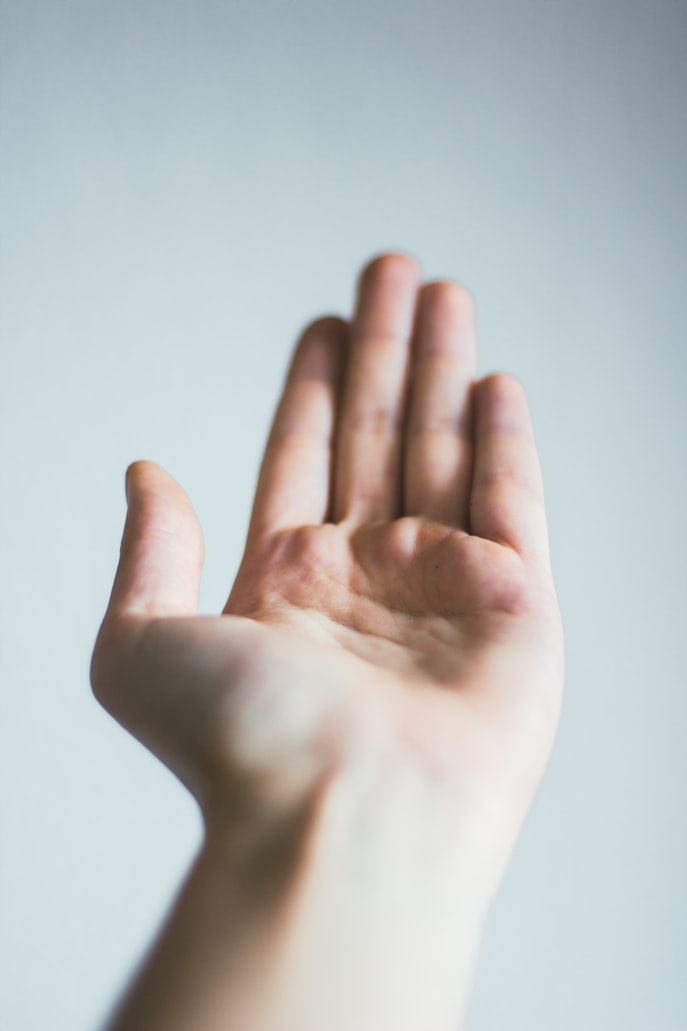

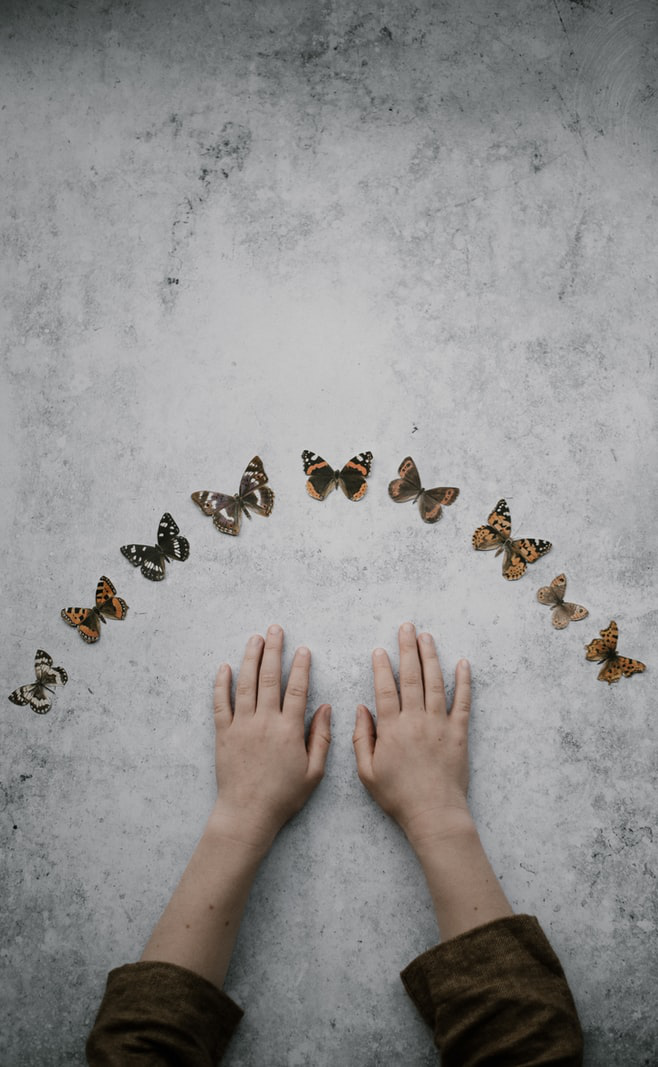

In [36]:
# Creat una lista para almacenar las URLs de las imagenes
urls = ["https://images.unsplash.com/photo-1503758478129-c2cb56b6b64a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80",
        "https://images.unsplash.com/photo-1512384581201-653524dbe0c4?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=658&q=80"]  

# Lee y visualiza la imagen
# Vamos a visualizarlas en un bucle 
for url in urls:
  image = io.imread(url) 
  resize_and_show(image)


Ejecutar esta celda si hemos usado la función UPLOAD

In [ ]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

# Modelo

Definimos la instancia del modelo que vamos a usar.

In [38]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

Todos los ejemplos de la API de Python de MediaPipe Solutions se encuentran en mp.solutions.

Para la solución MediaPipe Hands, podemos acceder a este módulo como `mp_hands = mp.solutions.hands`.

Podemos cambiar los parámetros, como `static_image_mode`,` max_num_hands` y `min_detection_confidence`, durante la inicialización.

Para ayuda adicional, ejecutaríamos `help (mp_hands.Hands)` para obtener más información sobre los parámetros. 

In [39]:

help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Method

# Inferencia y Visualización

Forward propagation del modelo y el uso de OpenCV para visualizar el mapa de características de la matriz resultante. [texto del enlace](https://)

Handedness of 0:
[classification {
  index: 0
  score: 0.9206098318099976
  label: "Left"
}
]
Hand landmarks of 0:
Index finger tip coordinate: ( 356.2355228662491, 325.8026825785637)


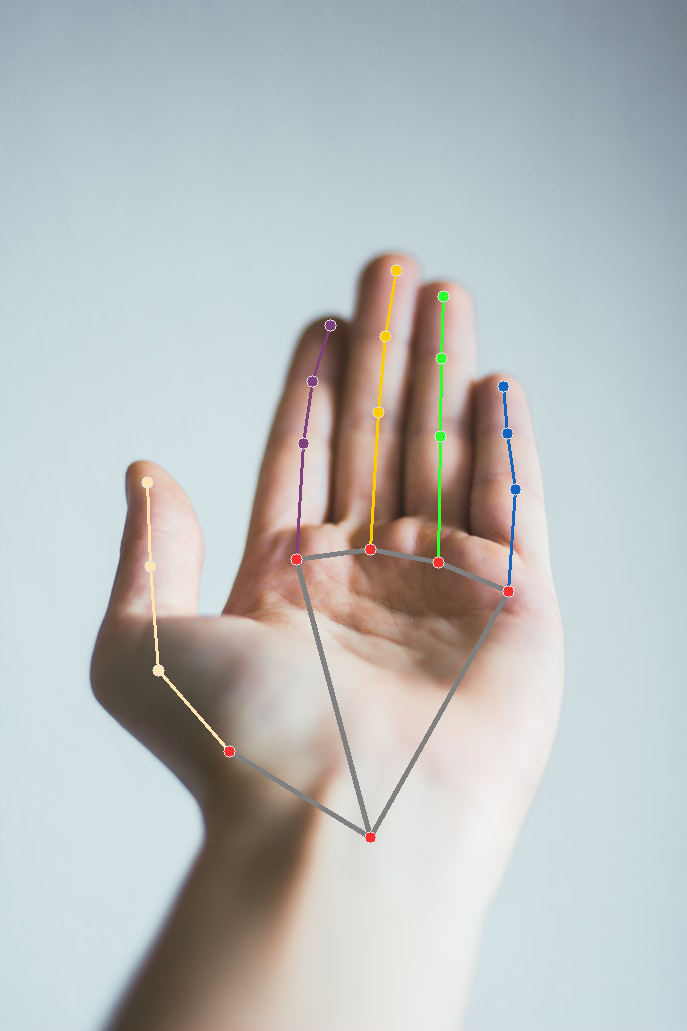

Handedness of 1:
[classification {
  index: 1
  score: 0.9674491882324219
  label: "Right"
}
, classification {
  index: 0
  score: 0.9254106283187866
  label: "Left"
}
]
Hand landmarks of 1:
Index finger tip coordinate: ( 277.2028064727783, 653.5976129770279)
Index finger tip coordinate: ( 353.24826443195343, 653.6262957453728)


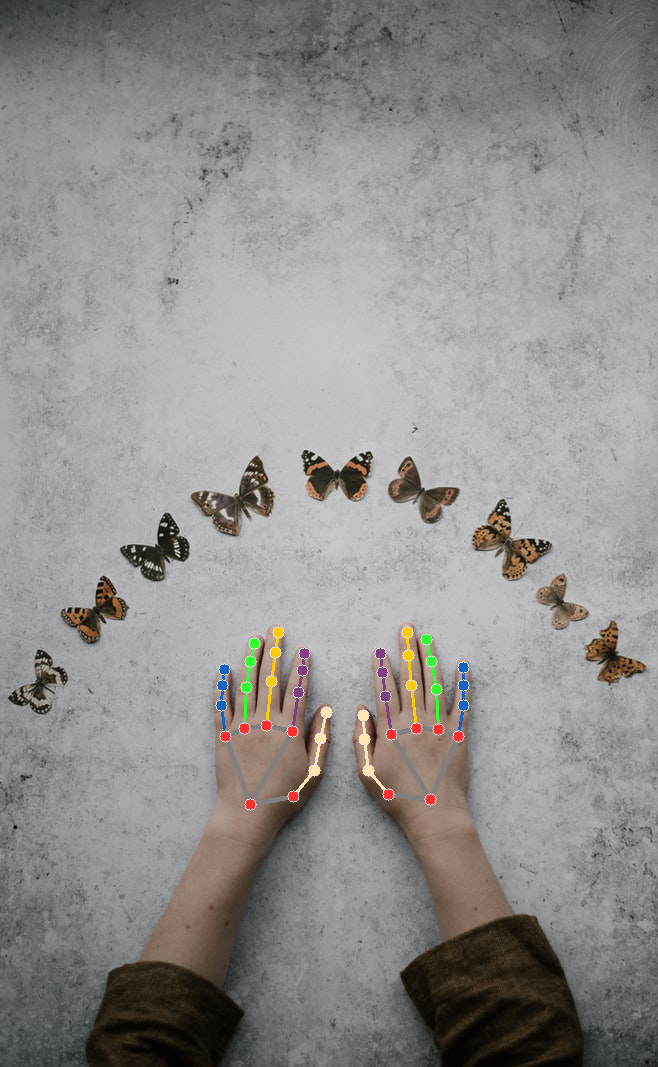

In [51]:
# Lista para guardar las imagenes procesadas
processed_imgs = []

# Opcional
images = urls

# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  # for name, image in images.items(): # Usar esta línea si imagenes subidas por nosotros
  for name, image in enumerate(images):
    image = cv2.cvtColor(io.imread(image), cv2.COLOR_BGR2RGB)
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
    
    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
      

    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    resize_and_show(cv2.flip(annotated_image, 1))
    
    # Guardar la imagen con los metadatos
    data_dictionary = {}
    data_dictionary['IMG'] = annotated_image
    processed_imgs.append(data_dictionary)

    


In [52]:
len(processed_imgs)

2

In [53]:
processed_imgs[0]['IMG'].shape

(1031, 687, 3)